Load your Dataset

In [ ]:
documents = open("dataset.txt").readlines()

In [ ]:
documents = [x[:-1] for x in documents]
documents

In [ ]:
num_minhash = 20
band_size = 10
K = 5

shingled example of "university of AmirKabir" with K = 2

un, ni, iv, ve, er, rs, si, it, ty, y , o, of, f , A, Am, mi, ir, rK, Ka, ab, bi, ir

In [ ]:
def create_shingle(docs: str, k: int):
    """
    :param docs: Entire documents list
    :param k: Shingle size
    :return: A set of k-shingles
    """
    shingle_set = []
    #TODO-Task1: start your code

    #end your code
    return shingle_set

In [ ]:
documents_shingles = create_shingle(documents, k=K)
print(documents_shingles[2])

dont change this part just run it

In [ ]:
res1 = {'of Am', ' of A', 'ty of', 'f Ami', 'irKab', ' Amir', 'unive', 'mirKa', 'y of ', 'ivers', 'rsity', 'sity ',
        'versi', 'ersit', 'ity o', 'rKabi', 'niver', 'Kabir', 'AmirK'}
assert res1 == documents_shingles[0], "Test 1 Failed!"
print("Test 1 Successful!")

Now that we have our three shingles we create a shingle vocabulary by create a `union` between all three sets.

In [ ]:
vocab = set()
for shingle in documents_shingles:
    vocab.update(shingle)

print(vocab)

In [ ]:
def create_sparse_vectors(documents_shingles, vocab):
    """

    :param documents_list:
    :param vocab: Union of all shingles sets (type: List)
    :return: sparse vector matrix: on-hot ecoded of all sentences
    desired result for two sentences could be:
    [
     [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]
    ]
    """
    sparse_vector_matrix = []
    #TODO-Task2: start your code

    #end your code
    return sparse_vector_matrix

In [ ]:
input_matrix = create_sparse_vectors(documents_shingles, vocab)
input_matrix

So we now have one-hot encoded sparse vectors we can move onto *minhashing*.

## Minhashing

In [ ]:
def create_hash_fucntion(size: int):
    """
    Build a Permutation p (hash function) with mentioned size

    :param size: Length of hash function
    :return: A list of hash of length size
    desired result could be:
    [
     [5,8,4,1,2,...,78]
    ]
    """
    hash_func = []
    #TODO-Task3: start your code

    #end your code

    return hash_func

In [ ]:
def create_minhash_functions(num_minhash: int, vocab_size: int):
    """

    :param num_minhash:
    :param vocab_size:
    :return: list of minhash functions
    """
    minhashes = []
    for i in range(num_minhash):
        minhashes.append(create_hash_fucntion(vocab_size))

    return minhashes

In [ ]:
min_hashes = create_minhash_functions(num_minhash, len(vocab))
min_hashes

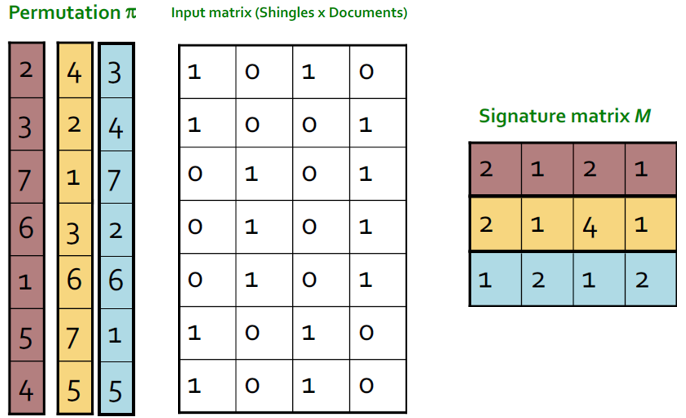

In [1]:
# don't run this cell.
from IPython.display import Image
Image(filename='lsh.png')

In [ ]:
def jaccard(a, b):
    """

    :param a:
    :param b:
    :return: Number of common values in a and b
    """
    a = set(a)
    b = set(b)
    result = 0
    #TODO-Task5: start your code

    #end your code
    return result

In [ ]:
t1 = {'a', 'b', 'c'}
t2 = {'a', 'b', 'd'}
assert jaccard(t1, t2) == 0.5, "Task5 faild"
print("task5 successful")

In [ ]:
jaccard(signature_matrix[2], signature_matrix[1])

In [ ]:
def create_bands(signatures, band_size):
    bands = []
    for signature in signatures:
        r = len(signature) // band_size

        sub_bands = []
        for i in range(0, len(signature), r):
            sub_bands.append(signature[i: i + r])
        bands.append(sub_bands)
    return bands

In [ ]:
bands = create_bands(signature_matrix, band_size)
bands

In [ ]:
def get_candidate_pairs(doc_index, bands):
    candidateds_ids = []
    for i in range(len(bands)):
        if i == doc_index:
            continue
        current_band = bands[doc_index]
        target_band = bands[i]
        for current_row, target_row in zip(current_band, target_band):
            if current_row == target_row:
                candidateds_ids.append(i)
                break

    return candidateds_ids

In [ ]:
target_id = 2

In [ ]:
candidates = get_candidate_pairs(target_id, bands)
candidates

In [ ]:
print("Target sentence")
print(documents[target_id])

In [ ]:
print("Candidate sentences")
for index in candidates:
    print(documents[index])


In [ ]:
def get_topk_similar(trget_id, candidates, k):
    """

    :param trget_id:
    :param candidates:
    :return: k most similar sentences from candidates to target sentence
    """
    result = []
    #TODO-Task6: start your code

    #end your code
    return result

In [ ]:
print('Similar sentences:')
print(get_topk_similar(target_id, candidates, k=5))
